In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.neural_network import MLPRegressor

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

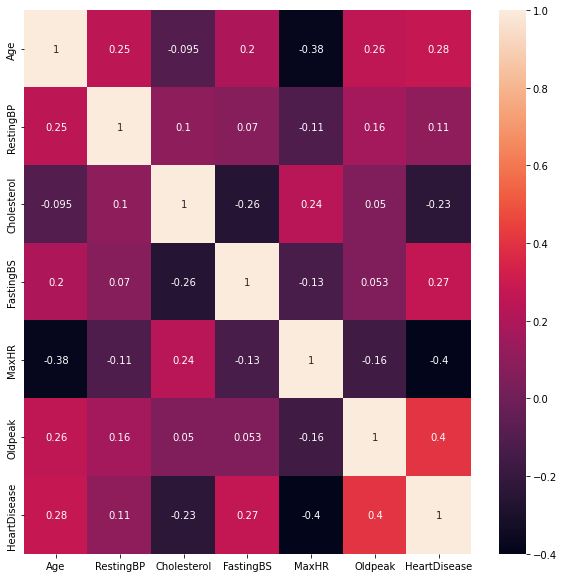

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
def correlation(df,threshold):
    coll_corr=set() 
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] 
                coll_corr.add(colname)3
    return coll_corr 

In [ ]:
corr = correlation(data.iloc[:,:-1],0.85)

In [ ]:
len(set(corr))

0

In [ ]:
numeric_col=[col for col in data if data[col].dtype !="object" ]
categorical_col=[col for col in data if data[col].dtype=="object" ]
numeric_col.remove("HeartDisease")


In [ ]:
data[numeric_col]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [ ]:
fig = go.Figure(
    data=[go.Bar(y=data[numeric_col])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)
fig.show(renderer="colab")

In [ ]:
fig = px.histogram(data, 'Age',             
                   color="HeartDisease",histfunc="count",
                   title="<b>Age vs HeartDisease</b>")

fig.show(renderer="colab")



In [ ]:
fig = px.histogram(data, x='Cholesterol',        
                   color="HeartDisease",
                   title="<b>Cholesterol vs HeartDisease</b>")

fig.show(renderer="colab")

In [ ]:
fig = px.pie(data, names = "HeartDisease",
             title = "<b>Counts in HeartDisease</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400)



fig.show(renderer = 'colab')

In [ ]:
fig = px.histogram(data_frame = data,
             x = "Sex",
             color="HeartDisease", title="<b>Sex vs HeartDisease</b>",
             template='plotly_dark', width=500,height=300)

fig.show(renderer = 'colab')

In [ ]:
X=data.iloc[:,0:-1]
y=data.HeartDisease

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)



X_train shape:  (642, 11)
X_test shape:  (276, 11)
Y_train shape:  (642,)
Y_test shape:  (276,)


Columns names:  Index(['Oldpeak'], dtype='object')


skewed value:--->> Oldpeak    1.045232
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



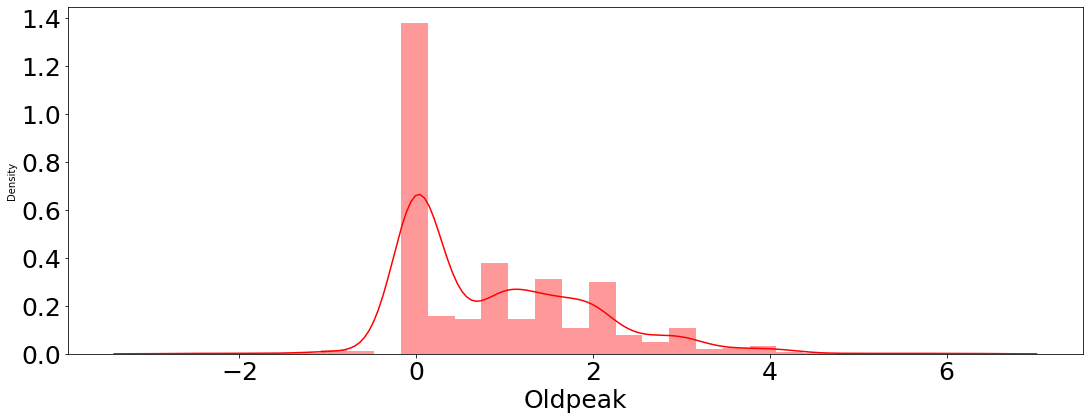

In [ ]:
skew_limit=0.75 
skew_vals=x_train[numeric_col].drop('FastingBS', axis=1).skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

i=1    
print("Columns names: ",skew_col.index)
print("\n")
print("skewed value:--->>",skew_col)
plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1
        

plt.show()

In [ ]:
pt=PowerTransformer(standardize=False)
skew=["Oldpeak"]
x_train[skew]=pt.fit_transform(x_train[skew])
x_test[skew]=pt.transform(x_test[skew])



In [ ]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
712,58,M,ASY,100,234,0,Normal,156,N,0.096924,Up
477,61,M,ASY,110,0,1,Normal,108,Y,1.340771,Down
409,53,M,NAP,160,0,1,LVH,122,Y,0.000000,Flat
448,63,M,ASY,160,230,1,Normal,105,Y,0.784840,Flat
838,63,M,ASY,130,330,1,LVH,132,Y,1.240498,Up


In [ ]:
x_train=pd.get_dummies(x_train,columns=categorical_col,drop_first=True) 
x_test=pd.get_dummies(x_test,columns=categorical_col,drop_first=True)
print("shape:",x_train.shape)
print()
x_train.head()

shape: (642, 15)



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
712,58,100,234,0,156,0.096924,1,0,0,0,1,0,0,0,1
477,61,110,0,1,108,1.340771,1,0,0,0,1,0,1,0,0
409,53,160,0,1,122,0.000000,1,0,1,0,0,0,1,1,0
448,63,160,230,1,105,0.784840,1,0,0,0,1,0,1,1,0
838,63,130,330,1,132,1.240498,1,0,0,0,0,0,1,0,1


In [ ]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.464714,-1.772314,0.294989,-0.525682,0.774609,-0.698581,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,-0.830346,-1.025241,1.158907
1,0.781767,-1.234868,-1.905390,1.902289,-1.173673,1.037494,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,-1.025241,-0.862882
2,-0.063707,1.452358,-1.905390,1.902289,-0.605424,-0.833861,0.544949,-0.489267,1.919930,-0.209529,-1.223950,-0.494152,1.204318,0.975381,-0.862882
3,0.993136,1.452358,0.257376,1.902289,-1.295440,0.261564,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,0.975381,-0.862882
4,0.993136,-0.159978,1.197709,1.902289,-0.199532,0.897540,0.544949,-0.489267,-0.520852,-0.209529,-1.223950,-0.494152,1.204318,-1.025241,1.158907


In [ ]:
linear = DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='auto',splitter='random')
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
score = linear.score(x_test,y_test)
print('Acc : ',accuracy_score(y_test,y_pred))
print('Score :',score)

Acc :  0.822463768115942
Score : 0.822463768115942


In [ ]:
def models_score(models, X_train, X_test, y_train, y_test):    
    
    scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test) 
        scores[name] = model.score(X_test,y_test)
        print("Model name: ",model)
        print("Accuracy :--->>",accuracy_score(y_test,y_pred))
        print()
        print(classification_report(y_test,y_pred))
        print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred)) 
        print("\n<<<<------------------------------------------------------------->>>>\n")
           
   
    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score',ascending=False)
    return model_scores
    

In [ ]:
models = {"LogisticRegression":LogisticRegression(solver="liblinear"),
          "SVC":SVC(C= 1.0,gamma= 0.05,kernel='rbf'),
          "DecisionTree":DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='auto',splitter='random'),
          "AdaBoost":AdaBoostClassifier(algorithm='SAMME',learning_rate= 0.1,n_estimators=150),
          "GradiantBoost":GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,loss='exponential',n_estimators=100),
         "RandomForest":RandomForestClassifier(criterion='gini',n_estimators=50),
         "XgBoost": XGBClassifier(learning_rate=0.1,n_estimators=50),
         "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=7)}

In [ ]:
model_scores = models_score(models, x_train, x_test, y_train, y_test)

Model name:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy :--->> 0.8731884057971014

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276

Confusion matrix:--->>
 [[ 99  13]
 [ 22 142]]

<<<<------------------------------------------------------------->>>>

Model name:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1,

In [ ]:
model_scores

,Score
GradiantBoost,0.891304
KNeighborsClassifier,0.891304
SVC,0.887681
XgBoost,0.880435
RandomForest,0.876812
LogisticRegression,0.873188
AdaBoost,0.869565
DecisionTree,0.833333


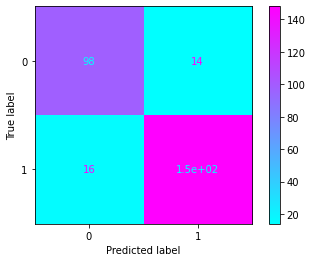

In [ ]:
gradient = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,loss='exponential',n_estimators=100)
gradient.fit(x_train,y_train)
plot_confusion_matrix(gradient,
                      x_test, y_test,
                      cmap="cool",
                      display_labels = ['0', '1'])
plt.grid(False)
plt.show();

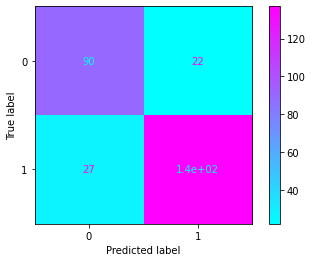

In [ ]:
knn = DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='auto',splitter='random')
knn.fit(x_train,y_train)
plot_confusion_matrix(knn,
                      x_test, y_test,
                      cmap="cool",
                      display_labels = ['0', '1'])
plt.grid(False)
plt.show();

In [ ]:
nn = MLPRegressor()
nn.fit(x_train,y_train)
y_pred = nn.predict(x_test)
score = nn.score(x_test,y_test)
print('Score :',score)

Score : 0.5275139376034342


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
[x_train.shape[1],]

[15]

In [ ]:
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential([
                    Dense(32,activation='relu',input_shape=[x_train.shape[1],]),
                    Dropout(0.3),
                    Dense(32,activation='relu'),
                    Dropout(0.3),
                    Dense(32,activation='relu'),
                    Dropout(0.3),
                    Dense(1,activation='sigmoid')
]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                512       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer=tf.keras.optimizer.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.33,batch_size=32,epochs=200)

Epoch 1/200
14/14 [==============================] - 0s 6ms/step - loss: 0.1409 - accuracy: 0.9651 - val_loss: 0.4489 - val_accuracy: 0.8632
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.1569 - accuracy: 0.9302 - val_loss: 0.4374 - val_accuracy: 0.8679
Epoch 3/200
14/14 [==============================] - 0s 4ms/step - loss: 0.1090 - accuracy: 0.9674 - val_loss: 0.4352 - val_accuracy: 0.8585
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 0.1154 - accuracy: 0.9535 - val_loss: 0.4277 - val_accuracy: 0.8632
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 0.1285 - accuracy: 0.9442 - val_loss: 0.4312 - val_accuracy: 0.8585
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.9512 - val_loss: 0.4297 - val_accuracy: 0.8538
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 0.1148 - accuracy: 0.9628 - val_loss: 0.4319 - val_accuracy: 0.8632
Epoch 8/200
1

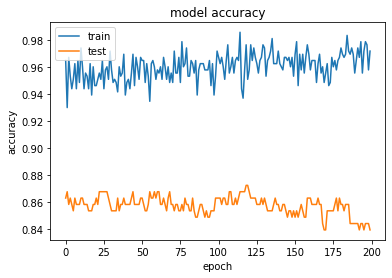

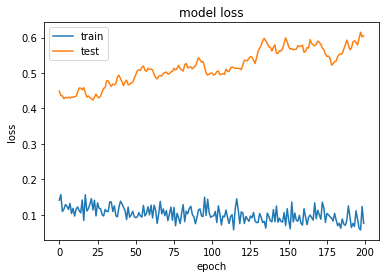

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()